<a href="https://colab.research.google.com/github/boneeyah/QTW/blob/main/Case%20Study%204/Case_Study_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Import the Libraries
from scipy.io import arff
import pandas as pd
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import numpy as np
from numpy import random
from itertools import product

from google.colab import drive
drive.mount('/content/drive')
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

import xgboost as xgb
from xgboost import DMatrix
from sklearn.preprocessing import OneHotEncoder


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.DataFrame()
i=1
x=str(i)
while i <6:
  data = arff.loadarff('/content/drive/MyDrive/Case_Study_4_Data/'+x+'year.arff')
  df_alt = pd.DataFrame(data[0])
  df = pd.concat([df,df_alt])
  i+=1
  x=str(i)

df


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22 

In [5]:
for i in df.columns:
  if df[i].isnull().sum() > len(df)*.05:
    print('{} contains {} NAs'.format(i,df[i].isnull().sum()))

Attr21 contains 5854 NAs
Attr27 contains 2764 NAs
Attr37 contains 18984 NAs


In [6]:
df.drop(['Attr27','Attr37'],inplace=True,axis=1)
x = [n for n in list(range(1,65)) if n not in [27,37]]

for i in x:
  df['Attr'+str(i)] = df[['Attr'+str(i),'class']].groupby(by='class').transform(lambda grp: grp.fillna(pd.Series.mode(grp)[0]))
df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43405 non-null  float64
 1   Attr2   43405 non-null  float64
 2   Attr3   43405 non-null  float64
 3   Attr4   43405 non-null  float64
 4   Attr5   43405 non-null  float64
 5   Attr6   43405 non-null  float64
 6   Attr7   43405 non-null  float64
 7   Attr8   43405 non-null  float64
 8   Attr9   43405 non-null  float64
 9   Attr10  43405 non-null  float64
 10  Attr11  43405 non-null  float64
 11  Attr12  43405 non-null  float64
 12  Attr13  43405 non-null  float64
 13  Attr14  43405 non-null  float64
 14  Attr15  43405 non-null  float64
 15  Attr16  43405 non-null  float64
 16  Attr17  43405 non-null  float64
 17  Attr18  43405 non-null  float64
 18  Attr19  43405 non-null  float64
 19  Attr20  43405 non-null  float64
 20  Attr21  43405 non-null  float64
 21  Attr22  43405 non-null  float64
 22 

In [8]:
import re

#binary logistic
# roc AUC scores
#precision
#recall
#accuracy
#90s (AUC)
#XGBoost and Random forest

#change where you round at for increases in  precision

In [9]:
df['class'].value_counts()

b'0'    41314
b'1'     2091
Name: class, dtype: int64

In [10]:
df['class'] = df['class'].astype(str)
df['class'] = df['class'].str.replace(r'[b]*', '')
df['class'] = df['class'].str.replace(r'[\']*', '')
df['class'] = df['class'].astype('category')

<ipython-input-10-45738530801f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['class'] = df['class'].str.replace(r'[b]*', '')
<ipython-input-10-45738530801f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['class'] = df['class'].str.replace(r'[\']*', '')


In [11]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

In [12]:
# Make target variable and data variable
y = df[['class']].astype(int).values.flatten()
X = df.loc[:, df.columns != 'class']

In [13]:
#takes about 30 mins on my pc
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=624,n_jobs=-1,n_estimators=50,criterion='entropy')

#log 2 is 6, sqrt is 8, will try a couple more values as well as none
params = {'min_samples_split':[2,4,8],'min_samples_leaf':[1,2,3],'max_features':['sqrt',7,10,'log2',None]}
grid = GridSearchCV(rf, param_grid=params,cv = 5, scoring = 'roc_auc')
results = grid.fit(X,y)

print(results.best_estimator_)
print(results.best_score_)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


RandomForestClassifier(criterion='entropy', max_features=None,
                       min_samples_leaf=3, min_samples_split=8, n_estimators=50,
                       n_jobs=-1, random_state=624)
0.910783937023379


random forest grid search returns the following best_score_ = 0.9107838212790099
best_params_ max_features = None, min_samples_leaf = 3, min_samples_split = 8

In [14]:
## fit model with best params
rf = RandomForestClassifier(random_state = 624,n_jobs = -1, n_estimators= 500, criterion= 'entropy',max_features=results.best_params_.get('max_features'), min_samples_leaf=results.best_params_.get('min_samples_leaf'), min_samples_split=results.best_params_.get('min_samples_split'),class_weight='balanced')
#rf = RandomForestClassifier(random_state = 624,n_jobs = -1, n_estimators= 500, criterion= 'entropy',max_features=None, min_samples_leaf=3, min_samples_split=8)

cv_results = cross_validate(rf,X,y,scoring = ['roc_auc','accuracy','precision','recall'])

In [15]:
print(cv_results)

{'fit_time': array([814.58124352, 800.96749759, 797.51462173, 820.0529983 ,
       806.91520572]), 'score_time': array([1.18171811, 0.70064592, 0.71089339, 0.70277381, 0.70549774]), 'test_roc_auc': array([0.91693544, 0.89812588, 0.9234541 , 0.93619189, 0.94596678]), 'test_accuracy': array([0.96025803, 0.95991245, 0.96152517, 0.9609492 , 0.96221633]), 'test_precision': array([0.91954023, 0.85714286, 0.875     , 0.88349515, 0.95959596]), 'test_recall': array([0.19138756, 0.20095694, 0.23444976, 0.21770335, 0.22673031])}


results from cross_val_score = {'fit_time': array([814.58124352, 800.96749759, 797.51462173, 820.0529983 ,
       806.91520572]), 'score_time': array([1.18171811, 0.70064592, 0.71089339, 0.70277381, 0.70549774]), 'test_roc_auc': array([0.91693544, 0.89812588, 0.9234541 , 0.93619189, 0.94596678]), 'test_accuracy': array([0.96025803, 0.95991245, 0.96152517, 0.9609492 , 0.96221633]), 'test_precision': array([0.91954023, 0.85714286, 0.875     , 0.88349515, 0.95959596]), 'test_recall': array([0.19138756, 0.20095694, 0.23444976, 0.21770335, 0.22673031])}


In [ ]:
dtrain = xgb.DMatrix(X, label=y, enable_categorical=True)
#dtest = xgb.DMatrix(X_test, label=y_test) #will use all the data for cross validation

In [ ]:
## this is an exhaustive search like gridsearchCV (we could switch to picking a random set of 15 ish)
#xgb cv uses a seed of 0, so should be reproducible
def search(search_dict,X,y):
  ret = {} #results dictionary
  idx = 0 #results counter
  prods = list(product(*search_dict.values()))
  dtrain = xgb.DMatrix(X,label=y)
  for i in prods:
    a_dict = dict(zip(search_dict.keys(),i)) #this will be the hyperparams used in function call
    out = xgb.cv(params=a_dict, num_boost_round=2000, dtrain=dtrain,nfold=5,stratified=True,early_stopping_rounds=5)
    index=out.shape[0]-1
    loss_results=out.iloc[index,:]
    ret.update({idx:{'params':a_dict,'loss':loss_results.to_dict(),'length':out.shape[0]}})
    idx +=1
  return(ret)

In [ ]:
hyper_dict = {'objective':['binary:logistic'],
              'eval_metric':['auc'],
              'eta':[0.01],
              'max_depth':[4,5,6,7],
              'gamma':[0,1,3],
              'lambda':[1,2,3],
              'alpha':[0,0.1,1]}
search_res = search(hyper_dict, X,y)

In [ ]:
best_params = {}
best_score = 0
for i in search_res:
  if search_res.get(i).get('loss').get('test-auc-mean') > best_score: #larger score is better? like in sklearn, it's got to be, right?
    best_score = search_res.get(i).get('loss').get('test-auc-mean')
    best_params.update({'best_params':search_res.get(i).get('params')})
print(best_score)
print(best_params)

In [ ]:
#setting up a hyperparameter dataframe

#learning_rates = [0.1, 0.25, 0.3, 0.4, 0.5, 0.6] #won't tune for learning rate, since it's not a hyperparameter, smaller with more rounds is generally better, so will start with .001
max_depths = [3, 5, 10, 20]

param_df = pd.DataFrame(list(product(learning_rates, max_depths)), columns=['learning_rate', 'max_depth'])
param_df = shuffle(param_df)

#randomizing the dataframe order
param_df = param_df.reset_index()
param_df=param_df.drop(['index'], axis=1)
param_df

,learning_rate,max_depth
0,0.30,20
1,0.30,10
2,0.60,10
3,0.40,10
4,0.60,3
5,0.10,5
6,0.40,5
7,0.60,20
8,0.50,3
9,0.30,3


In [ ]:
trials = 15
best_params = {}
i=0

for i in range(trials):
  #random sampling from paramdf


  hyperparams = {'objective': 'binary:logistic', 'eta': param_df['learning_rate'][i], 'max_depth': param_df['max_depth'][i]}

  print(hyperparams)
  out=xgb.cv(params=hyperparams,  num_boost_round=30, dtrain=dtrain, nfold=5, stratified=True, early_stopping_rounds=5, verbose_eval=1)
  index=out.shape[0]-1
  result=out.iloc[index,2]
  if i< 1:
    best_result = result
    best_params = hyperparams

  if result< best_result:
      best_result = result
      best_params = hyperparams
      print('result: ' ,result)
      print('best result: ' ,best_result)
      print('hyperparameters: ' ,hyperparams)
      print('best hyperparameters: ' ,best_params)

      i+=1


{'objective': 'binary:logistic', 'eta': 0.3, 'max_depth': 20}
[0]	train-logloss:0.44790+0.00029	test-logloss:0.45192+0.00090
[1]	train-logloss:0.31107+0.00043	test-logloss:0.31810+0.00108
[2]	train-logloss:0.22357+0.00011	test-logloss:0.23388+0.00192
[3]	train-logloss:0.16392+0.00014	test-logloss:0.17698+0.00216
[4]	train-logloss:0.12232+0.00046	test-logloss:0.13808+0.00215
[5]	train-logloss:0.09242+0.00036	test-logloss:0.11093+0.00244
[6]	train-logloss:0.07064+0.00029	test-logloss:0.09172+0.00276
[7]	train-logloss:0.05447+0.00036	test-logloss:0.07736+0.00282
[8]	train-logloss:0.04248+0.00017	test-logloss:0.06734+0.00344
[9]	train-logloss:0.03347+0.00023	test-logloss:0.05989+0.00328
[10]	train-logloss:0.02682+0.00025	test-logloss:0.05498+0.00342
[11]	train-logloss:0.02161+0.00029	test-logloss:0.05102+0.00350
[12]	train-logloss:0.01777+0.00025	test-logloss:0.04844+0.00387
[13]	train-logloss:0.01475+0.00025	test-logloss:0.04666+0.00411
[14]	train-logloss:0.01243+0.00020	test-logloss:0.04

In [ ]:
best_params

{'objective': 'binary:logistic', 'eta': 0.5, 'max_depth': 5}

In [ ]:
hyperparams = { 'eta':0.5,
                'max_depth': 5,
                'objective': 'binary:logistic'}

XGBModel = xgb.XGBClassifier(params=hyperparams, num_boost_round=50, dtrain=dtrain, nfold=5, stratified=True, early_stopping_rounds=5, verbose_eval=1)

In [ ]:
#needs updating
cm = confusion_matrix(y[test],p)

plt.rcParams["figure.figsize"] = (7,7)
dist =ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ['Ham','Spam'])
dist.plot(cmap = "Blues")
plt.title("Confusion Matrix for SVC")
plt.grid(False)
plt.show()

NameError: ignored

In [ ]:
out

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.450124,0.000357,0.452195,0.000630
1,0.314638,0.000541,0.318561,0.001051
2,0.229106,0.000762,0.234403,0.001444
3,0.171727,0.001076,0.178485,0.001965
4,0.131634,0.000962,0.140218,0.002320
5,0.103055,0.001328,0.113195,0.002348
6,0.082302,0.001140,0.093999,0.002971
7,0.066170,0.000694,0.079625,0.003395
8,0.054074,0.000984,0.069482,0.003335
9,0.044830,0.000920,0.062058,0.003344


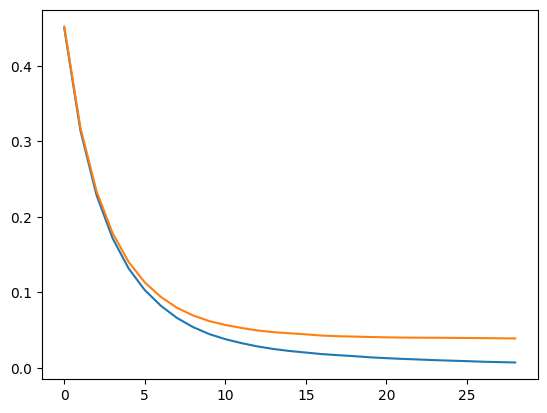

In [ ]:
import matplotlib.pyplot as plt

#needs to run longer to see differences in the lines?
plt.plot(out['train-logloss-mean'])
plt.plot(out['test-logloss-mean'])
plt.show()